# Import, laod and describe data

In [37]:
import shap
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import requests
import zipfile
import graphviz

os.environ["http_proxy"] = "10.31.255.65:8080"
os.environ["https_proxy"] = "10.31.255.65:8080"

In [31]:
df = pd.read_csv("data/mushrooms.csv")
target = df.pop("class")
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [32]:
df.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [58]:
df = pd.get_dummies(df)
df.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    df,
    target,
    test_size=0.3,
    random_state=0,
)

In [56]:
y_test

380     p
3641    e
273     e
1029    e
684     e
       ..
520     e
36      e
7959    p
6520    p
6005    p
Name: class, Length: 2438, dtype: object

# Decision Tree

In [45]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.9540607054963085

In [46]:
from sklearn import tree

dot_data = tree.export_graphviz(dt, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

'decision_tree.pdf'

In [49]:
explainer = shap.Explainer(dt.predict_proba, X_train)
shap_values = explainer(X_train)
np.shape(shap_values)

Permutation explainer: 5687it [02:18, 38.65it/s]                          


(5686, 117, 2)

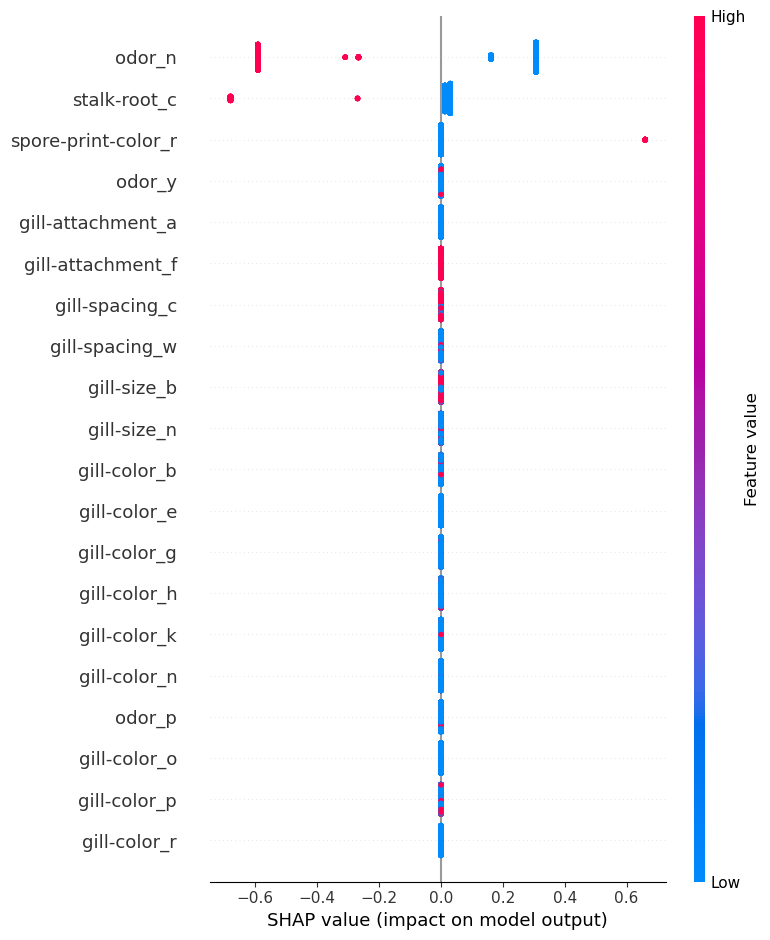

In [54]:
shap.summary_plot(shap_values[:, :, 1], X_train)

In [61]:
explainer = shap.Explainer(lr.predict_proba, X_train)
shap_values = explainer(X_test)

NameError: name 'lr' is not defined